In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from sklearn.model_selection import train_test_split
import random
import warnings
warnings.filterwarnings("ignore")

In [2]:
random.seed(10)

In [3]:
# Combined data from R data preprocessing
df = pd.read_csv('https://raw.githubusercontent.com/dgoon29/braves_pricing_2024/main/project/combined_data.csv', index_col=0)
df.head()

,event_name,Date,Tickets,Season,Game_Number,Day,effective_day,O_Team,Time_Type2,Month,...,concert,christian_concert,playoff_odds,delete,afternoon_weekday,afternoon_weekend,Week,weighted_odds,first_homestand,Time_Type
1,EZBB0329,2018-03-29,40208,2018.0,1.0,THU,THU,Philadelphia Phillies,2.0,Apr,...,0.0,0.0,3.0,0.0,1.0,0.0,13.0,3.0,1.0,2.0
2,EZBB0330,2018-03-30,35123,2018.0,2.0,FRI,FRI,Philadelphia Phillies,3.0,Apr,...,0.0,0.0,4.0,0.0,0.0,0.0,13.0,8.0,1.0,3.0
3,EZBB0331,2018-03-31,37777,2018.0,3.0,SAT,SAT,Philadelphia Phillies,3.0,Apr,...,0.0,0.0,3.0,0.0,0.0,0.0,13.0,9.0,1.0,3.0
4,EZBB0402,2018-04-02,25054,2018.0,4.0,MON,MON,Washington Nationals,3.0,Apr,...,0.0,0.0,3.0,0.0,0.0,0.0,14.0,12.0,1.0,5.0
5,EZBB0403,2018-04-03,26782,2018.0,5.0,TUE,TUE,Washington Nationals,3.0,Apr,...,0.0,0.0,3.0,0.0,0.0,0.0,14.0,15.0,1.0,5.0


In [4]:
df.shape

(324, 32)

In [5]:
# Combined prediction data with no
df_pred = pd.read_csv('https://raw.githubusercontent.com/dgoon29/braves_pricing_2024/main/project/combined_test_data.csv', index_col=0)
df_pred.head()

,event_name,Date,Tickets,Season,Game_Number,Time_of_year,Day,effective_day,O_Team,Time_Type2,...,concert,christian_concert,playoff_odds,delete,afternoon_weekday,afternoon_weekend,Week,weighted_odds,first_homestand,Time_Type
1,EXBB0406,2023-04-06,NaN,2023,1,Opening Day,THU,THU,San Diego Padres,3,...,0,0,NaN,0,0,0,14,NaN,1,5
2,EXBB0407,2023-04-07,NaN,2023,2,Opening Homestand,FRI,FRI,San Diego Padres,3,...,0,0,NaN,0,0,0,14,NaN,1,3
3,EXBB0408,2023-04-08,NaN,2023,3,Opening Saturday,SAT,SAT,San Diego Padres,3,...,0,0,NaN,0,0,0,14,NaN,1,3
4,EXBB0409,2023-04-09,NaN,2023,4,Opening Homestand,SUN,SUN,San Diego Padres,3,...,0,0,NaN,0,0,1,15,NaN,1,5
5,EXBB0410,2023-04-10,NaN,2023,5,Opening Homestand,MON,MON,Cincinnati Reds,3,...,0,0,NaN,0,0,0,15,NaN,1,5


In [6]:
df_pred.shape

(81, 33)

In [7]:
# Check for missing values
df.isnull().sum()

event_name            0
Date                  0
Tickets               0
Season                1
Game_Number           1
Day                   1
effective_day         1
O_Team                1
Time_Type2            1
Month                 1
Weekend               1
School                1
start_of_homestand    1
end_of_homestand      1
Opening_Day           1
Holiday               1
Fourth_of_july        1
Final_Game            1
BobbleHead            1
replica               1
Day_In_Homestand      1
star_wars             1
concert               1
christian_concert     1
playoff_odds          1
delete                1
afternoon_weekday     1
afternoon_weekend     1
Week                  1
weighted_odds         1
first_homestand       1
Time_Type             1
dtype: int64

In [8]:
# prompt: I want to check the null values in df_pred dataframe
df_pred.isnull().sum()

event_name             0
Date                   0
Tickets               81
Season                 0
Game_Number            0
Time_of_year           0
Day                    0
effective_day          0
O_Team                 0
Time_Type2             0
Month                  0
Weekend                0
School                 0
start_of_homestand     0
end_of_homestand       0
Opening_Day            0
Holiday                0
Fourth_of_july         0
Final_Game             0
BobbleHead             0
replica                0
Day_In_Homestand       0
star_wars              0
concert                0
christian_concert      0
playoff_odds          81
delete                 0
afternoon_weekday      0
afternoon_weekend      0
Week                   0
weighted_odds         81
first_homestand        0
Time_Type              0
dtype: int64

### Handle Missing values

In [9]:

df_null = df[df.isnull().any(axis=1)]
df_null.head()


,event_name,Date,Tickets,Season,Game_Number,Day,effective_day,O_Team,Time_Type2,Month,...,concert,christian_concert,playoff_odds,delete,afternoon_weekday,afternoon_weekend,Week,weighted_odds,first_homestand,Time_Type
19,EZBB0517,2018-08-30,37603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# prompt: since it is only one row, I want to drop where I have null value

df = df.dropna()
df.isnull().sum()

event_name            0
Date                  0
Tickets               0
Season                0
Game_Number           0
Day                   0
effective_day         0
O_Team                0
Time_Type2            0
Month                 0
Weekend               0
School                0
start_of_homestand    0
end_of_homestand      0
Opening_Day           0
Holiday               0
Fourth_of_july        0
Final_Game            0
BobbleHead            0
replica               0
Day_In_Homestand      0
star_wars             0
concert               0
christian_concert     0
playoff_odds          0
delete                0
afternoon_weekday     0
afternoon_weekend     0
Week                  0
weighted_odds         0
first_homestand       0
Time_Type             0
dtype: int64

In [11]:
# Format numbers
def count_formatter(x, pos):
    if x >= 1e6:
        return '{:1.1f}M'.format(x*1e-6)
    elif x >= 1e3:
        return '{:1.1f}K'.format(x*1e-3)
    else:
        return str(int(x))

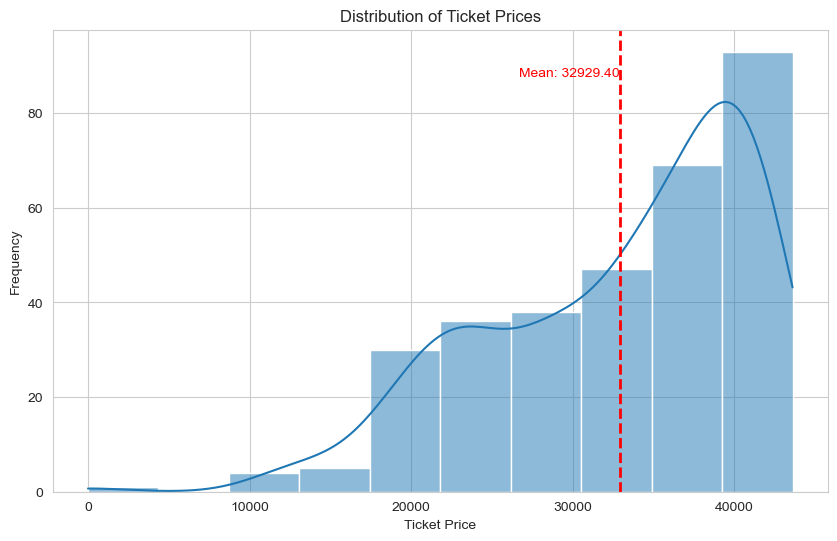

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and 'Tickets' is the column with ticket prices

# Create a histogram of the ticket prices
plt.figure(figsize=(10, 6))
sns.histplot(df['Tickets'], bins=10, kde=True)

# Calculate the mean of the ticket prices
mean_value = df['Tickets'].mean()

# Add a vertical line at the mean
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2)

# Add a title and labels
plt.title('Distribution of Ticket Prices')
plt.xlabel('Ticket Price')
plt.ylabel('Frequency')

# Annotate the mean value
plt.text(mean_value, plt.gca().get_ylim()[1]*0.90, 'Mean: {:.2f}'.format(mean_value), color='red', ha='right')
plt.gca().yaxis.set_major_formatter(FuncFormatter(count_formatter))
# Show the plot
plt.show()


In [13]:
# Assuming df and df_pred are already loaded DataFrames

# List of columns in df
df_columns = df.columns.tolist()

# List of columns in df_pred
df_pred_columns = df_pred.columns.tolist()

# Identify columns in df_pred that are not in df
columns_to_drop = [col for col in df_pred_columns if col not in df_columns]

# Dropping these columns from df_pred
df_pred_dropped = df_pred.drop(columns=columns_to_drop, errors='ignore')

# Now, df_pred_dropped contains only the columns that are also present in df


# Assuming df and df_pred are your actual DataFrames

# List of columns in df
df_columns = df.columns.tolist()

# List of columns in df_pred
df_pred_columns = df_pred.columns.tolist()

# Identify columns in df that are not in df_pred
columns_not_in_df_pred = [col for col in df_columns if col not in df_pred_columns]

df_dropped = df.drop(columns=columns_not_in_df_pred, errors='ignore')


df = df_dropped
df_pred = df_pred_dropped


In [14]:
df.describe()

,Tickets,Season,Game_Number,Time_Type2,Weekend,School,start_of_homestand,end_of_homestand,Opening_Day,Holiday,...,concert,christian_concert,playoff_odds,delete,afternoon_weekday,afternoon_weekend,Week,weighted_odds,first_homestand,Time_Type
count,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,...,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000
mean,32929.399381,2020.006192,41.111455,2.532508,0.495356,0.616099,0.160991,0.151703,0.015480,0.006192,...,0.021672,0.006192,61.990712,0.030960,0.068111,0.176471,26.755418,2368.027864,0.080495,3.597523
std,8138.344758,1.582108,23.397987,0.823582,0.500754,0.487089,0.368093,0.359289,0.123643,0.078567,...,0.145836,0.078567,31.513330,0.173477,0.252328,0.381812,7.668537,2327.682927,0.272481,1.448578
min,0.000000,2018.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,13.000000,3.000000,0.000000,1.000000
25%,27645.500000,2019.000000,21.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,34.000000,0.000000,0.000000,0.000000,20.000000,600.000000,0.000000,3.000000
50%,35108.000000,2021.000000,41.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,69.000000,0.000000,0.000000,0.000000,27.000000,1435.000000,0.000000,4.000000
75%,39969.000000,2021.500000,61.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,96.500000,0.000000,0.000000,0.000000,33.000000,3713.500000,0.000000,5.000000
max,43619.000000,2022.000000,81.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,100.000000,1.000000,1.000000,1.000000,41.000000,8100.000000,1.000000,5.000000


In [15]:
df.head()

,event_name,Date,Tickets,Season,Game_Number,Day,effective_day,O_Team,Time_Type2,Month,...,concert,christian_concert,playoff_odds,delete,afternoon_weekday,afternoon_weekend,Week,weighted_odds,first_homestand,Time_Type
1,EZBB0329,2018-03-29,40208,2018.0,1.0,THU,THU,Philadelphia Phillies,2.0,Apr,...,0.0,0.0,3.0,0.0,1.0,0.0,13.0,3.0,1.0,2.0
2,EZBB0330,2018-03-30,35123,2018.0,2.0,FRI,FRI,Philadelphia Phillies,3.0,Apr,...,0.0,0.0,4.0,0.0,0.0,0.0,13.0,8.0,1.0,3.0
3,EZBB0331,2018-03-31,37777,2018.0,3.0,SAT,SAT,Philadelphia Phillies,3.0,Apr,...,0.0,0.0,3.0,0.0,0.0,0.0,13.0,9.0,1.0,3.0
4,EZBB0402,2018-04-02,25054,2018.0,4.0,MON,MON,Washington Nationals,3.0,Apr,...,0.0,0.0,3.0,0.0,0.0,0.0,14.0,12.0,1.0,5.0
5,EZBB0403,2018-04-03,26782,2018.0,5.0,TUE,TUE,Washington Nationals,3.0,Apr,...,0.0,0.0,3.0,0.0,0.0,0.0,14.0,15.0,1.0,5.0


In [16]:
# prompt: I want to do feature selection for predicting price using backward regression
import statsmodels.api as sm

# Define the initial model with all features
# columns to drop

columns = ['event_name', 'O_Team']
X = df.drop(columns, axis=1)
y = df['Tickets']

# Assuming 'Tickets' is your target variable
X = df.drop('Tickets', axis=1)
y = df['Tickets']

# Convert 'Date' to datetime and extract features (optional)
X['Date'] = pd.to_datetime(X['Date'])
X['Year'] = X['Date'].dt.year
X['Month'] = X['Date'].dt.month
X['Day'] = X['Date'].dt.day
X.drop('Date', axis=1, inplace=True)

day_to_num = {
    'MON': 0,
    'TUE': 1,
    'WED': 2,
    'THU': 3,
    'FRI': 4,
    'SAT': 5,
    'SUN': 6
}

# Apply the mapping to convert 'effective_day' abbreviations to numeric values
X['effective_day'] = X['effective_day'].map(day_to_num)

X = X.drop(['event_name', 'O_Team'], axis=1)
X.shape

(323, 29)

In [17]:
import statsmodels.api as sm

# Assuming 'X' is your feature set and 'y' is your target variable
# Ensure both X and y are correctly defined here

# Adding constant column of ones, mandatory for sm.OLS model
X = sm.add_constant(X)

# Initial fit of the model with all features
model = sm.OLS(y, X).fit()

# Step 4 & 5: Iteratively remove the least significant variable and refit
while True:
    # Check for the max p-value
    max_p_value = max(model.pvalues)
    feature_with_max_p_value = model.pvalues.idxmax()

    if max_p_value > 0.05:
        # If max p-value > threshold, drop the feature
        X = X.drop(columns=[feature_with_max_p_value])

        # Ensure there's more than just the constant left before refitting
        if X.shape[1] > 1:
            # Refit the model without the dropped feature
            model = sm.OLS(y, X).fit()
        else:
            print("All variables removed, only constant remains.")
            break
    else:
        # If no p-values are above the threshold, stop the loop
        break

# Print or return the most significant columns
significant_columns = [col for col in X.columns if col != 'const']
print("Most significant columns:", significant_columns)


Most significant columns: ['Season', 'Game_Number', 'effective_day', 'Time_Type2', 'School', 'BobbleHead', 'replica', 'Day_In_Homestand', 'playoff_odds', 'delete', 'afternoon_weekday', 'Week', 'weighted_odds', 'Time_Type', 'Year']


In [18]:
# Final model summary
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                Tickets   R-squared (uncentered):                   0.976
Model:                            OLS   Adj. R-squared (uncentered):              0.974
Method:                 Least Squares   F-statistic:                              879.5
Date:                Sun, 10 Mar 2024   Prob (F-statistic):                   2.23e-239
Time:                        14:31:25   Log-Likelihood:                         -3228.6
No. Observations:                 323   AIC:                                      6485.
Df Residuals:                     309   BIC:                                      6538.
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [19]:
# Splitting the dataset
X = X[significant_columns]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X.shape

(323, 15)

In [20]:
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np
import pandas as pd

# Assuming df is your DataFrame and you have already defined X and y
# Example: X = df.drop('target_column', axis=1), y = df['target_column']

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define numerical and categorical features
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns

# Adjusting the preprocessing pipeline to include imputation
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with the mean
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values for categorical data
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features),
    ])

# Define the pipeline with the preprocessor and the model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', Ridge())])

# Define the parameter grid for hyperparameter tuning
param_grid = {'model__alpha': [0.1, 1.0, 10.0, 100.0]}

# Set up GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_absolute_error', error_score=np.nan)

# Fit the model
grid_search.fit(X_train, y_train)

# Output the best parameters and the corresponding score
print("Best parameters:", grid_search.best_params_)
print("Best CV score (negative MAE):", -grid_search.best_score_)

# Predict and evaluate on the test set
y_pred = grid_search.predict(X_test)
test_mae = mean_absolute_error(y_test, y_pred)
print("Test MAE:", test_mae)


Best parameters: {'model__alpha': 1.0}
Best CV score (negative MAE): 4459.321278008382
Test MAE: 3898.1733271752564


In [21]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

models = {
    'Ridge': Ridge(),
    'DecisionTree': DecisionTreeRegressor(),
    'RandomForest': RandomForestRegressor(),
    'GradientBoost': GradientBoostingRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'XGBoost': XGBRegressor(),
    'LightGBM': LGBMRegressor(),
    'SVR': SVR()
}

param_grids = {
    'Ridge': {'model__alpha': [0.1, 1.0, 10.0, 100.0]},
    'DecisionTree': {'model__max_depth': [None, 10, 20, 30]},
    'RandomForest': {'model__n_estimators': [50, 100, 200], 'model__max_depth': [None, 10, 20]},
    'GradientBoost': {'model__n_estimators': [100, 200, 300], 'model__learning_rate': [0.01, 0.1, 0.2]},
    'AdaBoost': {'model__n_estimators': [50, 100, 200], 'model__learning_rate': [0.01, 0.1, 1.0]},
    'XGBoost': {'model__n_estimators': [100, 200], 'model__learning_rate': [0.01, 0.1]},
    'LightGBM': {'model__n_estimators': [100, 200], 'model__learning_rate': [0.01, 0.1]},
    'SVR': {'model__C': [0.1, 1, 10], 'model__kernel': ['linear', 'rbf']}
}


In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error

results = []

for model_name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])

    param_grid = param_grids[model_name]
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_absolute_error', verbose=-1)

    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)

    results.append((model_name, mae, grid_search.best_params_))

results.sort(key=lambda x: x[1])

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000443 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 233
[LightGBM] [Info] Number of data points in the train set: 206, number of used features: 11
[LightGBM] [Info] Start training from score 33177.990291
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

In [23]:
for model_name, mae, best_params in results:
    print(f"Model: {model_name}, MAE: {mae}, Best Parameters: {best_params}")


Model: XGBoost, MAE: 2932.5928786057693, Best Parameters: {'model__learning_rate': 0.1, 'model__n_estimators': 200}
Model: GradientBoost, MAE: 3062.008440998891, Best Parameters: {'model__learning_rate': 0.1, 'model__n_estimators': 100}
Model: RandomForest, MAE: 3123.7244102564105, Best Parameters: {'model__max_depth': 20, 'model__n_estimators': 100}
Model: LightGBM, MAE: 3147.505705820088, Best Parameters: {'model__learning_rate': 0.1, 'model__n_estimators': 100}
Model: DecisionTree, MAE: 3451.6615384615384, Best Parameters: {'model__max_depth': 30}
Model: Ridge, MAE: 3898.1733271752564, Best Parameters: {'model__alpha': 1.0}
Model: AdaBoost, MAE: 4120.867569804326, Best Parameters: {'model__learning_rate': 1.0, 'model__n_estimators': 100}
Model: SVR, MAE: 5799.732112987952, Best Parameters: {'model__C': 10, 'model__kernel': 'linear'}


In [24]:
# Assuming 'results' contains your models sorted by MAE, with the best model first
best_model_info = results[0]  # Best model information
best_model_name, best_model_mae, best_model_params = best_model_info

# Print out the best model's name and MAE for confirmation
print(f"Best Model: {best_model_name} with MAE: {best_model_mae}")
print(f"Best Parameters: {best_model_params}")


Best Model: XGBoost with MAE: 2932.5928786057693
Best Parameters: {'model__learning_rate': 0.1, 'model__n_estimators': 200}


In [25]:
best_model_info

('XGBoost',
 2932.5928786057693,
 {'model__learning_rate': 0.1, 'model__n_estimators': 200})

In [26]:
# Exclude the 'Tickets' and any non-feature columns before predicting
df_pred_features = df_pred.drop(columns=['Tickets'])
df_pred_features = df_pred_features.drop(columns, axis=1)

df_pred_features['Date'] = pd.to_datetime(df_pred_features['Date'])
df_pred_features['Year'] = df_pred_features['Date'].dt.year
df_pred_features['Month'] = df_pred_features['Date'].dt.month
df_pred_features['Day'] = df_pred_features['Date'].dt.day
df_pred_features.drop('Date', axis=1, inplace=True)

day_to_num = {
    'MON': 0,
    'TUE': 1,
    'WED': 2,
    'THU': 3,
    'FRI': 4,
    'SAT': 5,
    'SUN': 6
}

# Apply the mapping to convert 'effective_day' abbreviations to numeric values
df_pred_features['effective_day'] = df_pred_features['effective_day'].map(day_to_num)

# Preprocess the features using the pipeline
df_pred_preprocessed = best_model.named_steps['preprocessor'].transform(df_pred_features)
df_pred_preprocessed

array([[ 1.90789573, -1.7331137 , -0.21006029, ..., -1.68626951,
         0.        ,  0.96706334],
       [ 1.90789573, -1.69012741,  0.31105082, ..., -1.68626951,
         0.        , -0.38159797],
       [ 1.90789573, -1.64714113,  0.83216193, ..., -1.68626951,
         0.        , -0.38159797],
       ...,
       [ 1.90789573,  1.61981651,  0.31105082, ...,  1.59371792,
         0.        , -0.38159797],
       [ 1.90789573,  1.6628028 ,  0.83216193, ...,  1.59371792,
         0.        , -0.38159797],
       [ 1.90789573,  1.70578908,  1.35327304, ...,  1.72491742,
         0.        , -1.73025927]])

In [27]:
# Predict using the pipeline
predicted_tickets = best_model.named_steps['model'].predict(df_pred_preprocessed)

# Add predictions back to df_pred
df_pred['Tickets'] = predicted_tickets
# Save or further process df_pred as needed
#df_pred.to_csv('predicted_tickets.csv', index=False)

df_pred['Tickets'].head()

1    33781.329330
2    34918.706607
3    35177.120582
4    34569.694673
5    32271.639821
Name: Tickets, dtype: float64

In [28]:
import pandas as pd

# Assuming df_pred is your existing DataFrame

# Select the columns and set the constant value for the 'name' column
new_df = df_pred[['event_name', 'Tickets']].copy()
new_df['name'] = 'Group 10'  # Setting a constant value for the 'name' column
new_df['event_name'] = new_df['event_name'].astype(str)  # Casting to string (CHAR)
new_df['Tickets'] = pd.to_numeric(new_df['Tickets'], errors='coerce')  # Casting to numeric (NUMERIC)

new_df.rename(columns={'Tickets': 'tickets'}, inplace=True)

# Save the new DataFrame to CSV
new_df.to_csv('solution_prediction.csv', index=False)

# Save the new DataFrame to Excel
new_df.to_excel('solution_prediction_excel.xlsx', index=False)

